In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [35]:
import jieba

list0 = jieba.cut('我原来是一名Java工程师，后来喜欢上了Python语言', cut_all=True)
print("全模式:",list(list0))

list1 = jieba.cut('我原来是一名Java工程师，后来喜欢上了Python语言', cut_all=False)
print("精准模式:",list(list1))

###输出结果：
全模式: ['我', '原来', '是', '一名', 'Java', '工程', '工程师', '', '', '后来', '喜欢', '上', '了', 'Python', '语言']
精准模式: ['我', '原来', '是', '一名', 'Java', '工程师', '，', '后来', '喜欢', '上', '了', 'Python', '语言']

全模式: ['我', '原来', '是', '一名', 'Java', '工程', '工程师', '，', '后来', '喜欢', '上', '了', 'Python', '语言']
精准模式: ['我', '原来', '是', '一名', 'Java', '工程师', '，', '后来', '喜欢', '上', '了', 'Python', '语言']


In [36]:
# 以词频来控制最终显示字体的大小，重复次数越多，最终显示越大
# 即是写成：”offspring后代“ jieba也能给自动分开

# 测试文本

'''
传统 traditional 后代 offspring 安全 security 额外 extra 熟人 familiar 简单 simple 易懂 understandable 
尊重 respect 长远 long-lasting 微信 Wechat 文化 culture 中国 China 英国 England 大不列颠 United Kingdom 
金钱 Money 基金 fund 长久 long time 回报 return 
人工智能 AI 机器学习 Machine Learning 高学历 Education 
有资格 Qualification 投资人 investors 管理人 manager 私募 private fund 资产 equity 资金 capital 周期 period 

其中，90％的留学生们对自己在英国的学习生活很满意，还有80％的留学生对自己在留学期间获得的支持表示满意，82％认为他们攻读英国学位是物有所值的。
英国大学联盟还盘点了这些留学生的国家地区，中国大陆勇夺桂冠，印度、美国、中国香港、马来西亚也紧随其后。

25.2% of Chinese people were 18 to 24 years old – the highest percentage of Chinese people out of all age groups. The second highest percentage was in the 25 to 29 age group (12.2%). The younger age profile of the Chinese group could reflect the high proportion of students aged 16 and over within the Chinese population and this group 
17.4% of Chinese households were made up of married couples with dependent children, compared with 14.1% of White British households.

5.3% of Chinese households were made up of pensioners (either couples or single pensioners), compared with 23.0% of White British households.

7.5% of Chinese households were made up of all full-time students, compared with 0.4% of White British households. This was the highest percentage out of all Asian ethnic groups.

Source: Department for Education, England. Key stage 2 statistics 2018/19; Key stage 4 statistics, 207/18; A level and other 16 to 18 results, 2017/18. Figures for key stage 2 are rounded to whole numbers by DFE. ‘Primary education’ shows figures for key stage 2 reading, writing and maths, which pupils take when they are 10 or 11 years old.

中国 中国 中国 中国 China 英国 England 英国 England 英国 England 

2021 2021 2021 2021 2021 2021 2021 2021 2021 2021

后代 offspring后代 offspring后代 offspring后代 offspring

投资 investment 投资 investment 投资 investment investment 投资 

安全 security 安全 security 安全 security
'''

'\n传统 traditional 后代 offspring 安全 security 额外 extra 熟人 familiar 简单 simple 易懂 understandable \n尊重 respect 长远 long-lasting 微信 Wechat 文化 culture 中国 China 英国 England 大不列颠 United Kingdom \n金钱 Money 基金 fund 长久 long time 回报 return \n人工智能 AI 机器学习 Machine Learning 高学历 Education \n有资格 Qualification 投资人 investors 管理人 manager 私募 private fund 资产 equity 资金 capital 周期 period \n\n其中，90％的留学生们对自己在英国的学习生活很满意，还有80％的留学生对自己在留学期间获得的支持表示满意，82％认为他们攻读英国学位是物有所值的。\n英国大学联盟还盘点了这些留学生的国家地区，中国大陆勇夺桂冠，印度、美国、中国香港、马来西亚也紧随其后。\n\n25.2% of Chinese people were 18 to 24 years old – the highest percentage of Chinese people out of all age groups. The second highest percentage was in the 25 to 29 age group (12.2%). The younger age profile of the Chinese group could reflect the high proportion of students aged 16 and over within the Chinese population and this group \n17.4% of Chinese households were made up of married couples with dependent children, compared with 14.1% of White British households.\n\n5.3% of Chinese households w

In [37]:
import re
import collections

data_txt = open(r"/Users/paxton615/Desktop/feature_words1.txt", encoding='utf-8').read() # 我用sublime手动存了一个utf-8的.txt文件

#文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"')
data_txt = re.sub(pattern, '', data_txt)


#文本分词
cut_txt = jieba.cut(data_txt)
object_list=[]

# 移除非统计词汇和符号
remove_words = [u"的", u',', u'of', u'，', u"习近平",u'对',u'等',u'能',u'都',u'。',u' ',
                u'、',u'中',u'在',u'了',u'，',u'“',u'”',u'一个',u'是',u'人民日报', u'the']

#词频统计
for word in cut_txt:
    if word not in remove_words:
        object_list.append(word)

word_counts = collections.Counter(object_list)
# 显示词频
# word_counts

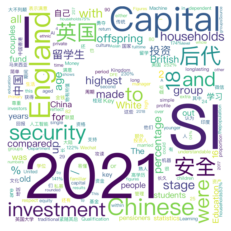

In [40]:
import numpy as np
from PIL import Image 

#定义词频背景

background_image = np.array(Image.open('/Users/paxton615/Desktop/bulb.jpg')) #图片分别率越高形状越清晰，必须是白底，
# 图案与白底的颜色对比一定要明显，可以用PS调色对比度，否则返回形状都是长方形，且最终显示输出的尺寸是跟着”读取图片“的大小而定的

# 读取txt文件和路径
font_path="/Users/paxton615/Desktop/feature_words1.txt"

wd = WordCloud(
    font_path="/System/Library/fonts/PingFang.ttc",  #设置字体格式，不然会乱码
    background_color='white',  #设置背景颜色
    mask=background_image   #设置背景图
).generate_from_frequencies(word_counts)

# 路径，保存词云图
wd.to_file('/Users/paxton615/Desktop/word_cloud.png') 

#显示词云图
plt.imshow(wd,interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
# 为了做一张Pound的词云图,我花费了2小时，动用了python，sublime，PS，做了很多次调试，结果是值得的

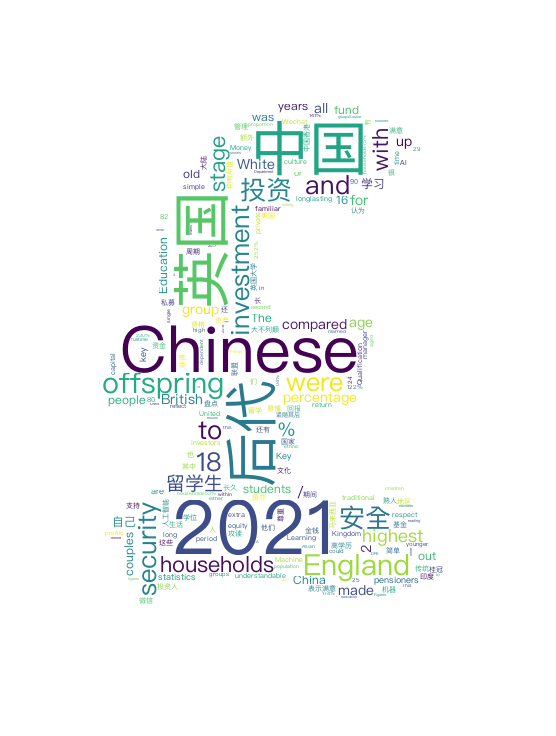

In [12]:
Image.open('/Users/paxton615/Github_Personal/Notes/Notes/pics/word_cloud/word_cloud.png')